# 상관관계 분석 및 파생변수 생성

## 1. 기존 데이터셋 확인

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./train_heat.csv').iloc[:,1:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499301 entries, 0 to 499300
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   train_heat.tm           499301 non-null  int64  
 1   train_heat.branch_id    499301 non-null  object 
 2   train_heat.ta           499301 non-null  float64
 3   train_heat.wd           499301 non-null  float64
 4   train_heat.ws           499301 non-null  float64
 5   train_heat.rn_day       499301 non-null  float64
 6   train_heat.rn_hr1       499301 non-null  float64
 7   train_heat.hm           499301 non-null  float64
 8   train_heat.si           499301 non-null  float64
 9   train_heat.ta_chi       499301 non-null  float64
 10  train_heat.heat_demand  499301 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 41.9+ MB


In [2]:
from scipy.stats import pearsonr, spearmanr, pointbiserialr

# 열 이름 간단히 정리
df.columns = [col.split('.')[-1] for col in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499301 entries, 0 to 499300
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   tm           499301 non-null  int64  
 1   branch_id    499301 non-null  object 
 2   ta           499301 non-null  float64
 3   wd           499301 non-null  float64
 4   ws           499301 non-null  float64
 5   rn_day       499301 non-null  float64
 6   rn_hr1       499301 non-null  float64
 7   hm           499301 non-null  float64
 8   si           499301 non-null  float64
 9   ta_chi       499301 non-null  float64
 10  heat_demand  499301 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 41.9+ MB


### 날짜 및 시간 열 분류하기

In [3]:
# tm 컬럼을 문자열로 변환
df['tm'] = df['tm'].astype(str)

# 년도, 월, 일, 시간 분리
df['year'] = df['tm'].str[0:4]
df['month'] = df['tm'].str[4:6]
df['day'] = df['tm'].str[6:8]
df['hour'] = df['tm'].str[8:10]

# 정수형으로 변환
df[['year', 'month', 'day', 'hour']] = df[['year', 'month', 'day', 'hour']].astype(int)

# 확인
df.head(10)

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand,year,month,day,hour
0,2021010101,A,-10.1,78.3,0.5,0.0,0.0,68.2,-99.00,-8.2,281,2021,1,1,1
1,2021010102,A,-10.2,71.9,0.6,0.0,0.0,69.9,-99.00,-8.6,262,2021,1,1,2
2,2021010103,A,-10.0,360.0,0.0,0.0,0.0,69.2,-99.00,-8.8,266,2021,1,1,3
3,2021010104,A,-9.3,155.9,0.5,0.0,0.0,65.0,-99.00,-8.9,285,2021,1,1,4
4,2021010105,A,-9.0,74.3,1.9,0.0,0.0,63.5,-99.00,-9.2,283,2021,1,1,5
5,2021010106,A,-9.0,81.9,1.5,0.0,0.0,66.9,-99.00,-9.2,285,2021,1,1,6
6,2021010107,A,-9.0,88.4,1.3,0.0,0.0,64.7,-99.00,-8.4,285,2021,1,1,7
7,2021010108,A,-8.6,88.9,1.2,0.0,0.0,63.8,0.00,-8.4,284,2021,1,1,8
8,2021010109,A,-7.4,71.6,1.3,0.0,0.0,61.2,0.27,-7.5,290,2021,1,1,9
9,2021010110,A,-4.7,157.5,0.5,0.0,0.0,50.4,0.76,-5.3,285,2021,1,1,10


### -99 값 nan 으로 채우기

In [4]:
df.replace(-99.0, np.nan, inplace=True)
df['wd'].replace(-9.9, np.nan, inplace=True)

/tmp/ipykernel_128740/3779110451.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wd'].replace(-9.9, np.nan, inplace=True)


### si 일사량 열 삭제

In [5]:
df = df.drop(columns=['si'])

In [6]:
df

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,ta_chi,heat_demand,year,month,day,hour
0,2021010101,A,-10.1,78.3,0.5,0.0,0.0,68.2,-8.2,281.0,2021,1,1,1
1,2021010102,A,-10.2,71.9,0.6,0.0,0.0,69.9,-8.6,262.0,2021,1,1,2
2,2021010103,A,-10.0,360.0,0.0,0.0,0.0,69.2,-8.8,266.0,2021,1,1,3
3,2021010104,A,-9.3,155.9,0.5,0.0,0.0,65.0,-8.9,285.0,2021,1,1,4
4,2021010105,A,-9.0,74.3,1.9,0.0,0.0,63.5,-9.2,283.0,2021,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499296,2023123119,S,3.2,233.5,0.4,2.5,0.0,91.5,2.8,34.0,2023,12,31,19
499297,2023123120,S,2.9,227.4,0.1,2.5,0.0,92.1,2.7,35.0,2023,12,31,20
499298,2023123121,S,2.1,360.0,0.0,2.5,0.0,93.3,1.4,35.0,2023,12,31,21
499299,2023123122,S,2.2,30.0,1.4,2.5,0.0,95.5,1.3,40.0,2023,12,31,22


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499301 entries, 0 to 499300
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   tm           499301 non-null  object 
 1   branch_id    499301 non-null  object 
 2   ta           486304 non-null  float64
 3   wd           478897 non-null  float64
 4   ws           480486 non-null  float64
 5   rn_day       480675 non-null  float64
 6   rn_hr1       480147 non-null  float64
 7   hm           459584 non-null  float64
 8   ta_chi       499281 non-null  float64
 9   heat_demand  499278 non-null  float64
 10  year         499301 non-null  int64  
 11  month        499301 non-null  int64  
 12  day          499301 non-null  int64  
 13  hour         499301 non-null  int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 53.3+ MB


## 2. 독립변수와 열수요(종속변수) 관계 분석

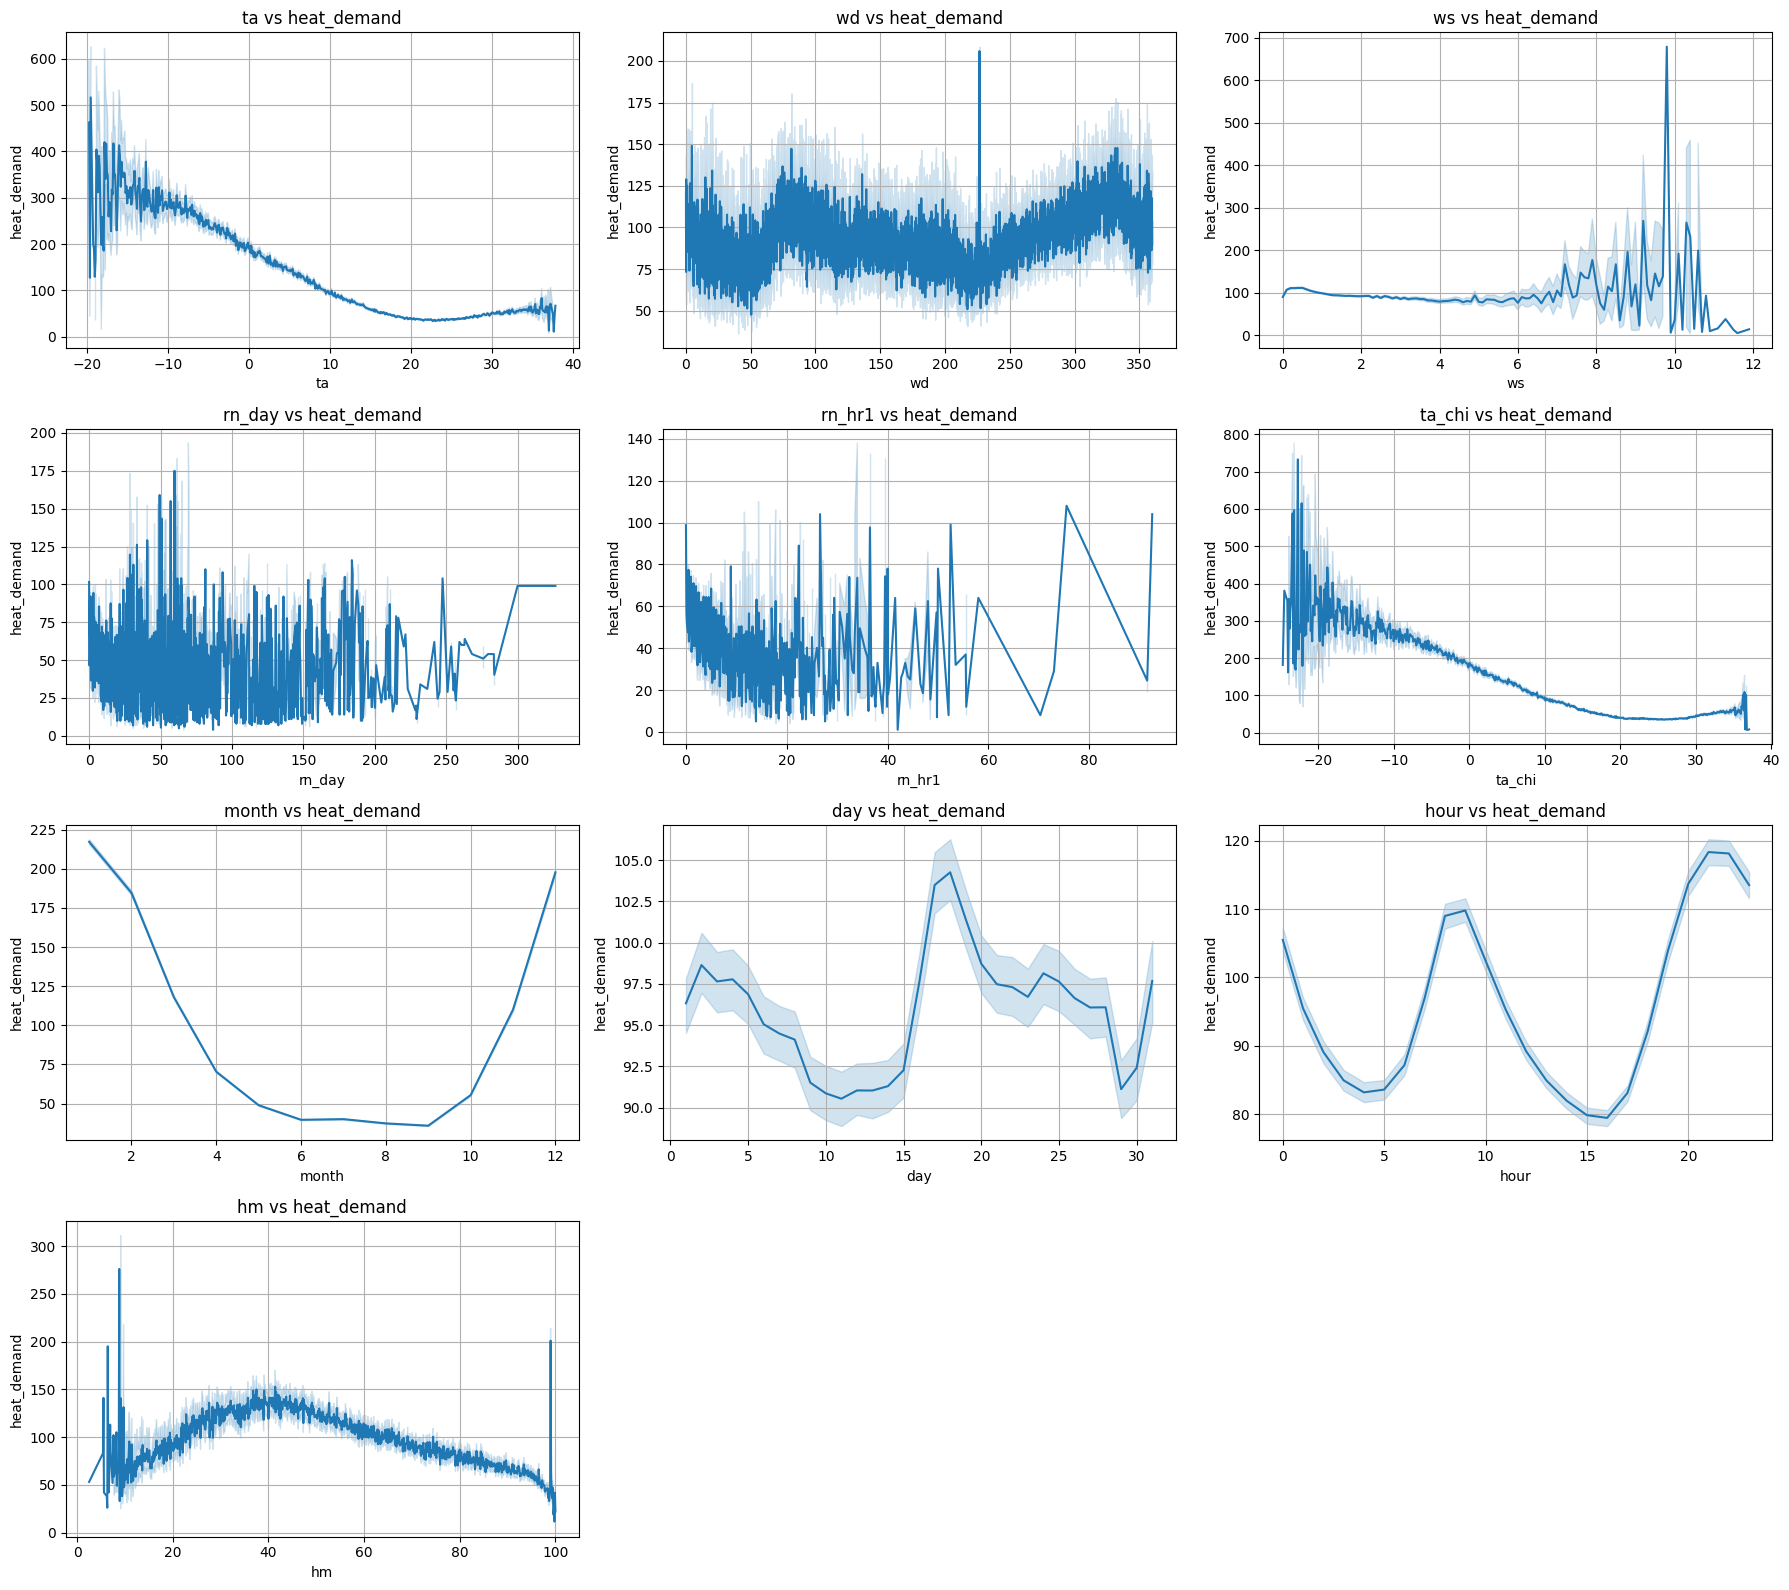

In [8]:
use_cols = ['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'ta_chi', 'month', 'day', 'hour', 'hm']

# subplot 행/열 수 자동 조절 (최대 3열씩)
n_cols = 3
n_rows = (len(use_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for idx, col in enumerate(use_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.lineplot(x=col, y='heat_demand', data=df)
    plt.title(f"{col} vs heat_demand")
    plt.xlabel(col)
    plt.ylabel("heat_demand")
    plt.grid(True)

plt.tight_layout()
plt.show()

### 피어슨 상관관계 분석
- 분석할 x : ta, ta_shi
- y : heat_demand

In [9]:
# 분석 대상 변수 목록
use_cols = ['ta', 'ta_chi']

# 결과 저장용 딕셔너리
results = {}

# heat_demand과의 상관계수 계산
for col in use_cols:
    corr = df[[col, 'heat_demand']].corr().iloc[0, 1]
    results[col] = round(corr, 4)

# DataFrame으로 정리
corr_df = pd.DataFrame.from_dict(results, orient='index', columns=['pearson_corr']).sort_values(by='pearson_corr', ascending=False)
display(corr_df)

,pearson_corr
ta_chi,-0.5654
ta,-0.5656


In [10]:
from scipy.stats import pearsonr

for col in ['ta', 'ta_chi']:
    # 1. 해당 컬럼과 heat_demand만 모은 새 df 생성
    df_temp = df[[col, 'heat_demand']].dropna()

    # 2. 상관계수 + p-value 계산
    corr, p_val = pearsonr(df_temp[col], df_temp['heat_demand'])

    # 3. 출력
    print(f"{col} → corr: {round(corr, 4)}, p-value: {p_val:.60f}")

ta → corr: -0.5656, p-value: 0.000000000000000000000000000000000000000000000000000000000000
ta_chi → corr: -0.5654, p-value: 0.000000000000000000000000000000000000000000000000000000000000


### 스피어만 상관관계 분석

In [11]:
use_cols = ['wd', 'ws', 'rn_day', 'rn_hr1', 'hm']
results_spearman = {}

for col in use_cols:
    corr = df[[col, 'heat_demand']].corr(method='spearman').iloc[0, 1]
    results_spearman[col] = round(corr, 4)

spearman_df = pd.DataFrame.from_dict(results_spearman, orient='index', columns=['spearman_corr']).sort_values(by='spearman_corr', ascending=False)
display(spearman_df)

,spearman_corr
wd,0.0632
ws,-0.0654
rn_hr1,-0.0737
rn_day,-0.0963
hm,-0.3006


In [12]:
from scipy.stats import spearmanr

use_cols = ['wd', 'ws', 'rn_day', 'rn_hr1', 'hm']

for col in use_cols:
    corr, p_val = spearmanr(df[col], df['heat_demand'], nan_policy='omit')
    print(f"{col} → corr: {round(corr, 4)}, p-value: {p_val:.10f}")

wd → corr: 0.0632, p-value: 0.0000000000
ws → corr: -0.0654, p-value: 0.0000000000
rn_day → corr: -0.0963, p-value: 0.0000000000
rn_hr1 → corr: -0.0737, p-value: 0.0000000000
hm → corr: -0.3006, p-value: 0.0000000000


### 지사별 박스플롯

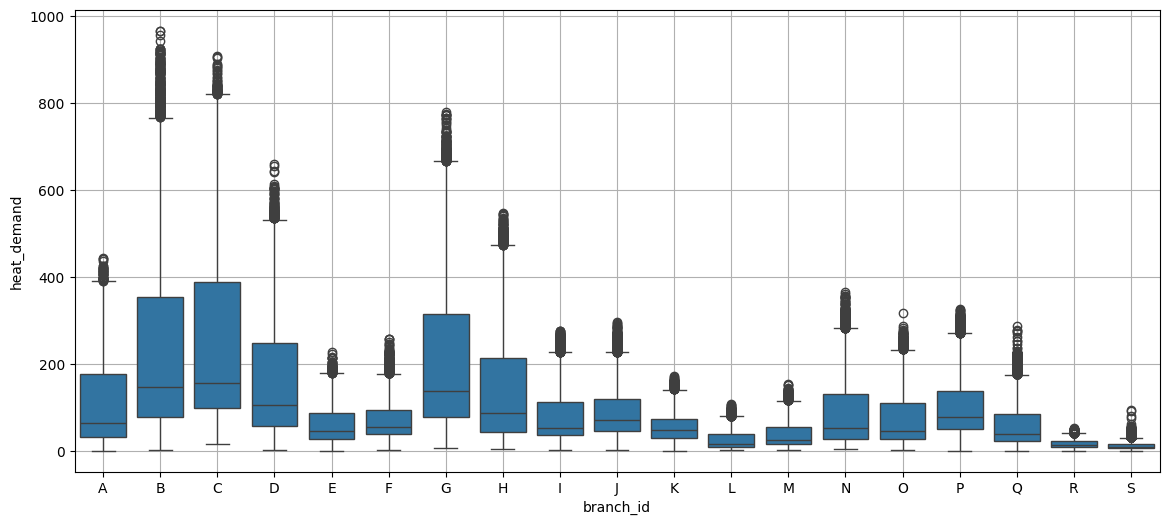

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='branch_id', y='heat_demand')
plt.xlabel('branch_id')
plt.ylabel('heat_demand')
plt.grid(True)
plt.show()

## 3. 파생변수 생성

### [ 파생변수1 : 월별 (계절) sin,con 으로 열 생성해서 상관관계 분석 ]

In [14]:
df['month_sin'] = np.sin(2 * np.pi * (df['month']-1) / 12)
df['month_cos'] = np.cos(2 * np.pi * (df['month']-1) / 12)

In [15]:
df['month_cos']

0         1.000000
1         1.000000
2         1.000000
3         1.000000
4         1.000000
            ...   
499296    0.866025
499297    0.866025
499298    0.866025
499299    0.866025
499300    0.866025
Name: month_cos, Length: 499301, dtype: float64

In [16]:
import pandas as pd
# 출력
df[['month', 'month_cos']].round(10).drop_duplicates().sort_values('month')

,month,month_cos
0,1,1.000000
743,2,0.866025
1415,3,0.500000
2159,4,0.000000
2879,5,-0.500000
3623,6,-0.866025
4343,7,-1.000000
5087,8,-0.866025
5831,9,-0.500000
6551,10,-0.000000


In [17]:
df

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,ta_chi,heat_demand,year,month,day,hour,month_sin,month_cos
0,2021010101,A,-10.1,78.3,0.5,0.0,0.0,68.2,-8.2,281.0,2021,1,1,1,0.0,1.000000
1,2021010102,A,-10.2,71.9,0.6,0.0,0.0,69.9,-8.6,262.0,2021,1,1,2,0.0,1.000000
2,2021010103,A,-10.0,360.0,0.0,0.0,0.0,69.2,-8.8,266.0,2021,1,1,3,0.0,1.000000
3,2021010104,A,-9.3,155.9,0.5,0.0,0.0,65.0,-8.9,285.0,2021,1,1,4,0.0,1.000000
4,2021010105,A,-9.0,74.3,1.9,0.0,0.0,63.5,-9.2,283.0,2021,1,1,5,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499296,2023123119,S,3.2,233.5,0.4,2.5,0.0,91.5,2.8,34.0,2023,12,31,19,-0.5,0.866025
499297,2023123120,S,2.9,227.4,0.1,2.5,0.0,92.1,2.7,35.0,2023,12,31,20,-0.5,0.866025
499298,2023123121,S,2.1,360.0,0.0,2.5,0.0,93.3,1.4,35.0,2023,12,31,21,-0.5,0.866025
499299,2023123122,S,2.2,30.0,1.4,2.5,0.0,95.5,1.3,40.0,2023,12,31,22,-0.5,0.866025


### [ 파생변수 2 : 휴일 (휴일(주말, 공휴일 등 모든 빨간날) : 1 / 평일 : 0) ]

In [18]:
import pandas as pd
import holidays

# 1. 대한민국 공휴일 지정
kr_holidays = holidays.KR(years=[2021,2022,2023])

# 2. df['tm']이 datetime 형식인지 확인하고, 아니라면 변환 
df['tm'] = pd.to_datetime(df['tm'], format="%Y%m%d%H")

# 3. 공휴일 또는 주말 여부 확인해서 새로운 열 생성
df['is_holiday'] = df['tm'].apply(
    lambda x: 1 if x in kr_holidays or x.weekday() >= 5 else 0
)

### 파생변수2 - 정규성 검정

<Axes: xlabel='heat_demand', ylabel='Count'>

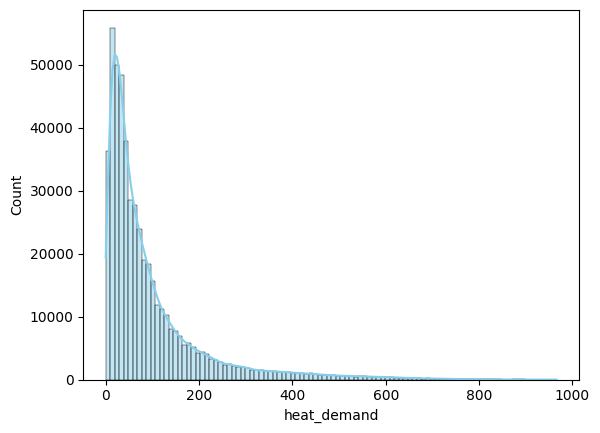

In [19]:
import seaborn as sns
sns.histplot(df['heat_demand'], kde=True, bins=100, color='skyblue')

In [20]:
from scipy.stats import anderson

result = anderson(df['heat_demand'], dist='norm')
print(result)

AndersonResult(statistic=np.float64(nan), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(95.87089957899207), scale=np.float64(115.26434737091407))
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.')


### [ 파생변수2 - 휴일 유의미성 검정 ]

In [21]:
# 상관관계 분석을 위해 nan을 제외한 데이터로 잠시 대체
df_ = df.copy()
df_.dropna(inplace=True)

<Axes: xlabel='is_holiday', ylabel='heat_demand'>

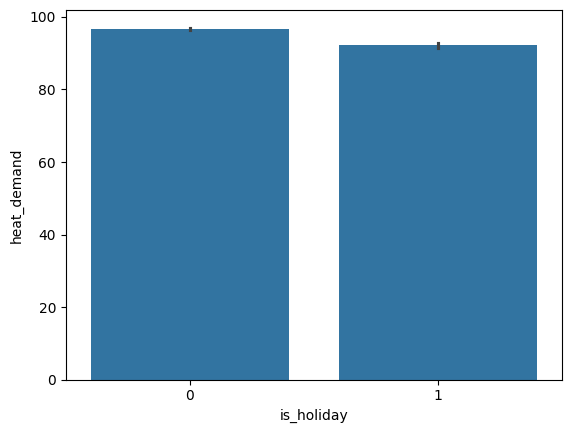

In [22]:
import seaborn as sns

sns.barplot(data = df_, x = 'is_holiday', y = 'heat_demand')

In [23]:
from scipy.stats import ttest_ind, mannwhitneyu

holiday = df_[df_['is_holiday']==1]['heat_demand']
weekday = df_[df_['is_holiday']==0]['heat_demand']
stat, p = mannwhitneyu(holiday, weekday)
print(f"mannwhitneyu stat: {stat:.20f}")
print(f"mannwhitneyu p-value: {p:.20f}")

mannwhitneyu stat: 20903853412.50000000000000000000
mannwhitneyu p-value: 0.00000000000000000000


### [ 파생변수 3 : 시간 별 분석 ]

In [24]:
import numpy as np

# 24시간 기준 주기성 변환
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

In [25]:
df

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,ta_chi,heat_demand,year,month,day,hour,month_sin,month_cos,is_holiday,hour_sin,hour_cos
0,2021-01-01 01:00:00,A,-10.1,78.3,0.5,0.0,0.0,68.2,-8.2,281.0,2021,1,1,1,0.0,1.000000,1,0.258819,0.965926
1,2021-01-01 02:00:00,A,-10.2,71.9,0.6,0.0,0.0,69.9,-8.6,262.0,2021,1,1,2,0.0,1.000000,1,0.500000,0.866025
2,2021-01-01 03:00:00,A,-10.0,360.0,0.0,0.0,0.0,69.2,-8.8,266.0,2021,1,1,3,0.0,1.000000,1,0.707107,0.707107
3,2021-01-01 04:00:00,A,-9.3,155.9,0.5,0.0,0.0,65.0,-8.9,285.0,2021,1,1,4,0.0,1.000000,1,0.866025,0.500000
4,2021-01-01 05:00:00,A,-9.0,74.3,1.9,0.0,0.0,63.5,-9.2,283.0,2021,1,1,5,0.0,1.000000,1,0.965926,0.258819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499296,2023-12-31 19:00:00,S,3.2,233.5,0.4,2.5,0.0,91.5,2.8,34.0,2023,12,31,19,-0.5,0.866025,1,-0.965926,0.258819
499297,2023-12-31 20:00:00,S,2.9,227.4,0.1,2.5,0.0,92.1,2.7,35.0,2023,12,31,20,-0.5,0.866025,1,-0.866025,0.500000
499298,2023-12-31 21:00:00,S,2.1,360.0,0.0,2.5,0.0,93.3,1.4,35.0,2023,12,31,21,-0.5,0.866025,1,-0.707107,0.707107
499299,2023-12-31 22:00:00,S,2.2,30.0,1.4,2.5,0.0,95.5,1.3,40.0,2023,12,31,22,-0.5,0.866025,1,-0.500000,0.866025


### [ 파생변수 4 : 일별 sin, cos 변환]

In [26]:
import calendar
import numpy as np

# 1. 해당 년/월에 맞는 총 일수 구하기
df['month_days'] = df.apply(
    lambda row: calendar.monthrange(row['year'], row['month'])[1], axis=1
)

# 2. day / month_days 비율로 주기 인코딩
df['day_sin'] = np.sin(2 * np.pi * (df['day']-1) / df['month_days'])
df['day_cos'] = np.cos(2 * np.pi * (df['day']-1) / df['month_days'])

In [27]:
df[['month', 'month_days']].drop_duplicates().sort_values(by='month')

,month,month_days
0,1,31
743,2,28
1415,3,31
2159,4,30
2879,5,31
3623,6,30
4343,7,31
5087,8,31
5831,9,30
6551,10,31


## 4. 사용하지 않는 열 삭제

In [28]:
# 여러 변수를 사용한 모델링 실험을 위해 사용하지 않는 변수도 일단 추가 
df_all = df[['tm', 'branch_id', 'is_holiday', 'ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'ta_chi', 'month_sin', 'month_cos',
        'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'heat_demand']]

In [29]:
df = df[['tm', 'branch_id','hm', 'is_holiday', 'ta_chi', 'month_sin', 'month_cos',
        'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'heat_demand']]

In [30]:
df.to_csv("./use_heat.csv", index=False)

In [31]:
df_all.to_csv("./all_heat.csv", index=False)

## 5. 데이터 결측치 전처리 

In [32]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./use_heat.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499301 entries, 0 to 499300
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   tm           499301 non-null  object 
 1   branch_id    499301 non-null  object 
 2   hm           459584 non-null  float64
 3   is_holiday   499301 non-null  int64  
 4   ta_chi       499281 non-null  float64
 5   month_sin    499301 non-null  float64
 6   month_cos    499301 non-null  float64
 7   hour_sin     499301 non-null  float64
 8   hour_cos     499301 non-null  float64
 9   day_sin      499301 non-null  float64
 10  day_cos      499301 non-null  float64
 11  heat_demand  499278 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 45.7+ MB


## 체감 온도 결측치 처리

In [33]:
# 결측치 개수 확인
print("결측치 개수:", df['ta_chi'].isna().sum())

결측치 개수: 20


In [34]:
import pandas as pd

# ta_chi 열의 결측치를 앞뒤 평균으로 채움
df['ta_chi'] = df['ta_chi'].fillna(
    (df['ta_chi'].shift(1) + df['ta_chi'].shift(-1)) / 2
)

In [35]:
# 결측치 개수 확인
print("결측치 개수:", df['ta_chi'].isna().sum())

결측치 개수: 0


## 상대 습도 결측치 처리

In [36]:
# 결측치 개수 확인
print("결측치 개수:", df['hm'].isna().sum())

결측치 개수: 39717


In [37]:
import pandas as pd

# ta_chi 열의 결측치를 앞뒤 평균으로 채움
df['hm'] = df['hm'].fillna(
    (df['hm'].shift(1) + df['hm'].shift(-1)) / 2
)

In [38]:
# 결측치 개수 확인
print("결측치 개수:", df['hm'].isna().sum())

결측치 개수: 39482


- 결측치를 이 단계에서 바로 처리하지 않은 이유는, 결측치가 있는 데이터를 단순히 삭제해버릴 경우 시계열 데이터셋 생성 시 연속적인 시간 흐름이 끊겨 버릴 수 있기 때문이다.
- 따라서 시계열 데이터셋을 생성하는 과정에서 결측치가 포함된 구간은 자동으로 제외하고, 연속된 시간 데이터를 갖춘 시퀀스만 저장되도록 구현하여 결측치를 처리할 예정이다.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499301 entries, 0 to 499300
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   tm           499301 non-null  object 
 1   branch_id    499301 non-null  object 
 2   hm           459819 non-null  float64
 3   is_holiday   499301 non-null  int64  
 4   ta_chi       499301 non-null  float64
 5   month_sin    499301 non-null  float64
 6   month_cos    499301 non-null  float64
 7   hour_sin     499301 non-null  float64
 8   hour_cos     499301 non-null  float64
 9   day_sin      499301 non-null  float64
 10  day_cos      499301 non-null  float64
 11  heat_demand  499278 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 45.7+ MB


In [40]:
df.to_csv('final_heat.csv', index=False)

## 6. timesteps 결정을 위한 ACF 분석

In [2]:
df = pd.read_csv('final_heat.csv')
df

,tm,branch_id,hm,is_holiday,ta_chi,month_sin,month_cos,hour_sin,hour_cos,day_sin,day_cos,heat_demand
0,2021-01-01 01:00:00,A,68.2,1,-8.2,0.0,1.000000,0.258819,0.965926,0.000000,1.00000,281.0
1,2021-01-01 02:00:00,A,69.9,1,-8.6,0.0,1.000000,0.500000,0.866025,0.000000,1.00000,262.0
2,2021-01-01 03:00:00,A,69.2,1,-8.8,0.0,1.000000,0.707107,0.707107,0.000000,1.00000,266.0
3,2021-01-01 04:00:00,A,65.0,1,-8.9,0.0,1.000000,0.866025,0.500000,0.000000,1.00000,285.0
4,2021-01-01 05:00:00,A,63.5,1,-9.2,0.0,1.000000,0.965926,0.258819,0.000000,1.00000,283.0
...,...,...,...,...,...,...,...,...,...,...,...,...
499296,2023-12-31 19:00:00,S,91.5,1,2.8,-0.5,0.866025,-0.965926,0.258819,-0.201299,0.97953,34.0
499297,2023-12-31 20:00:00,S,92.1,1,2.7,-0.5,0.866025,-0.866025,0.500000,-0.201299,0.97953,35.0
499298,2023-12-31 21:00:00,S,93.3,1,1.4,-0.5,0.866025,-0.707107,0.707107,-0.201299,0.97953,35.0
499299,2023-12-31 22:00:00,S,95.5,1,1.3,-0.5,0.866025,-0.500000,0.866025,-0.201299,0.97953,40.0


<Figure size 1000x500 with 0 Axes>

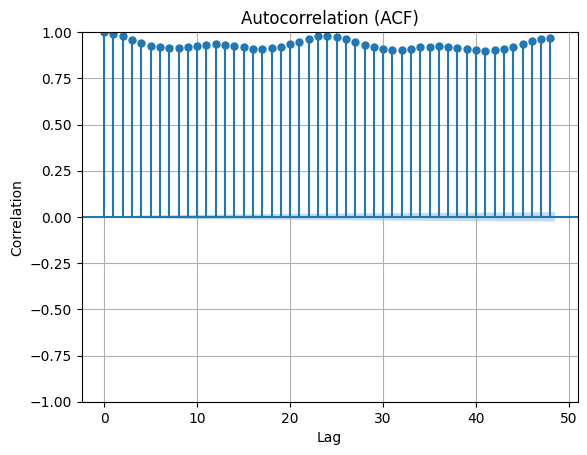

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

y = df['heat_demand'].dropna()

# ACF 그리기
plt.figure(figsize=(10, 5))
plot_acf(y, lags=) 
plt.title('Autocorrelation (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()